<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/07w_A_mon_0421_easy_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 07 데이터 정제

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex': ['M', 'F', np.nan, 'M', 'F'],
                   'score': [5,4,3,4,None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df.score+1

,score
0,6.0
1,5.0
2,4.0
3,5.0
4,NaN


In [ ]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isnull(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isna(df).sum()

,0
sex,1
score,1


In [ ]:
pd.isnull(df).sum()

,0
sex,1
score,1


In [ ]:
pd.isnull(df).sum(axis = 1)

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
pd.isnull(df).sum(axis = 0)

,0
sex,1
score,1


In [ ]:
df.isna().sum()

,0
sex,1
score,1


In [ ]:
df.isna().sum(axis = 0)

,0
sex,1
score,1


In [ ]:
df.isna().sum(axis = 1)

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
s = pd.Series([True, False, True])
s

,0
0,True
1,False
2,True


In [ ]:
s.sum()

np.int64(2)

In [ ]:
s.any()

np.True_

In [ ]:
s.all()

np.False_

In [ ]:
s.any().sum()

np.int64(1)

In [ ]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
df.isna().any() #열별로

,0
sex,True
score,True


In [ ]:
df.isna().any().sum()

np.int64(2)

In [ ]:
df.isna().any(axis = 1).sum()

np.int64(2)

In [ ]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [ ]:
df.isna().all() # 모두 결측치이면 True

,0
sex,False
score,False


In [ ]:
df.isna().any(axis = 1)

,0
0,False
1,False
2,True
3,False
4,True


In [ ]:
df.isna().all(axis = 1)

,0
0,False
1,False
2,False
3,False
4,False


In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
~df.isna().any(axis = 1)

,0
0,True
1,True
2,False
3,True
4,False


In [ ]:
~df.isna().all(axis = 1)

,0
0,True
1,True
2,True
3,True
4,True


In [ ]:
df[df.isna().any(axis = 1)] #중요

,sex,score
2,NaN,3.0
4,F,NaN


TypeError: DataFrame.isna() got an unexpected keyword argument 'axis'

In [ ]:
df.loc[df.isna().any(axis = 1)] #중요

,sex,score
2,NaN,3.0
4,F,NaN


In [ ]:
df.loc[~df.isna().any(axis = 1)] #중요

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
df.loc[df.notna().all(axis = 1)] #중요

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## 결측값 시각화

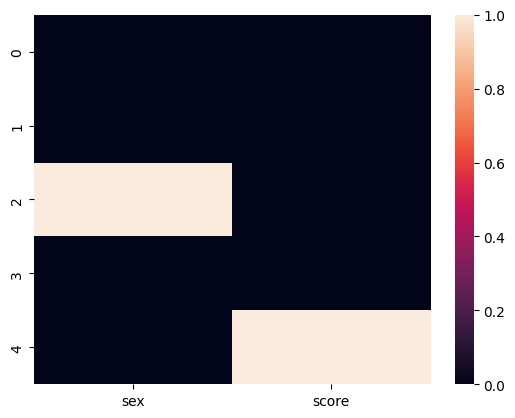

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna())
plt.show()

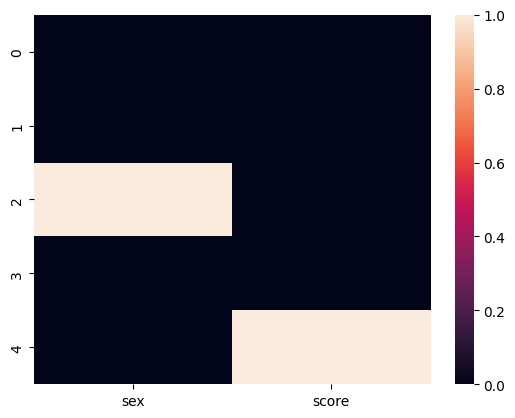

In [ ]:
sns.heatmap(df.isnull())
plt.show()

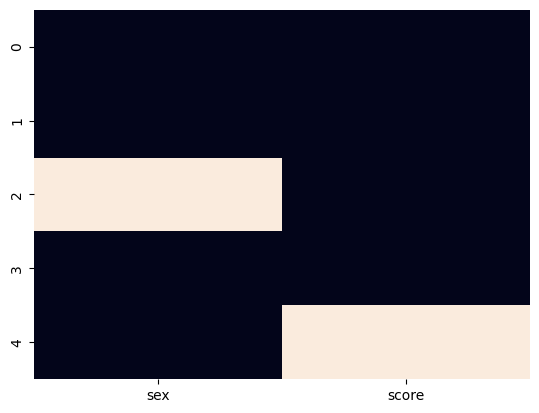

In [ ]:
sns.heatmap(df.isna(), cbar = False)
plt.show()

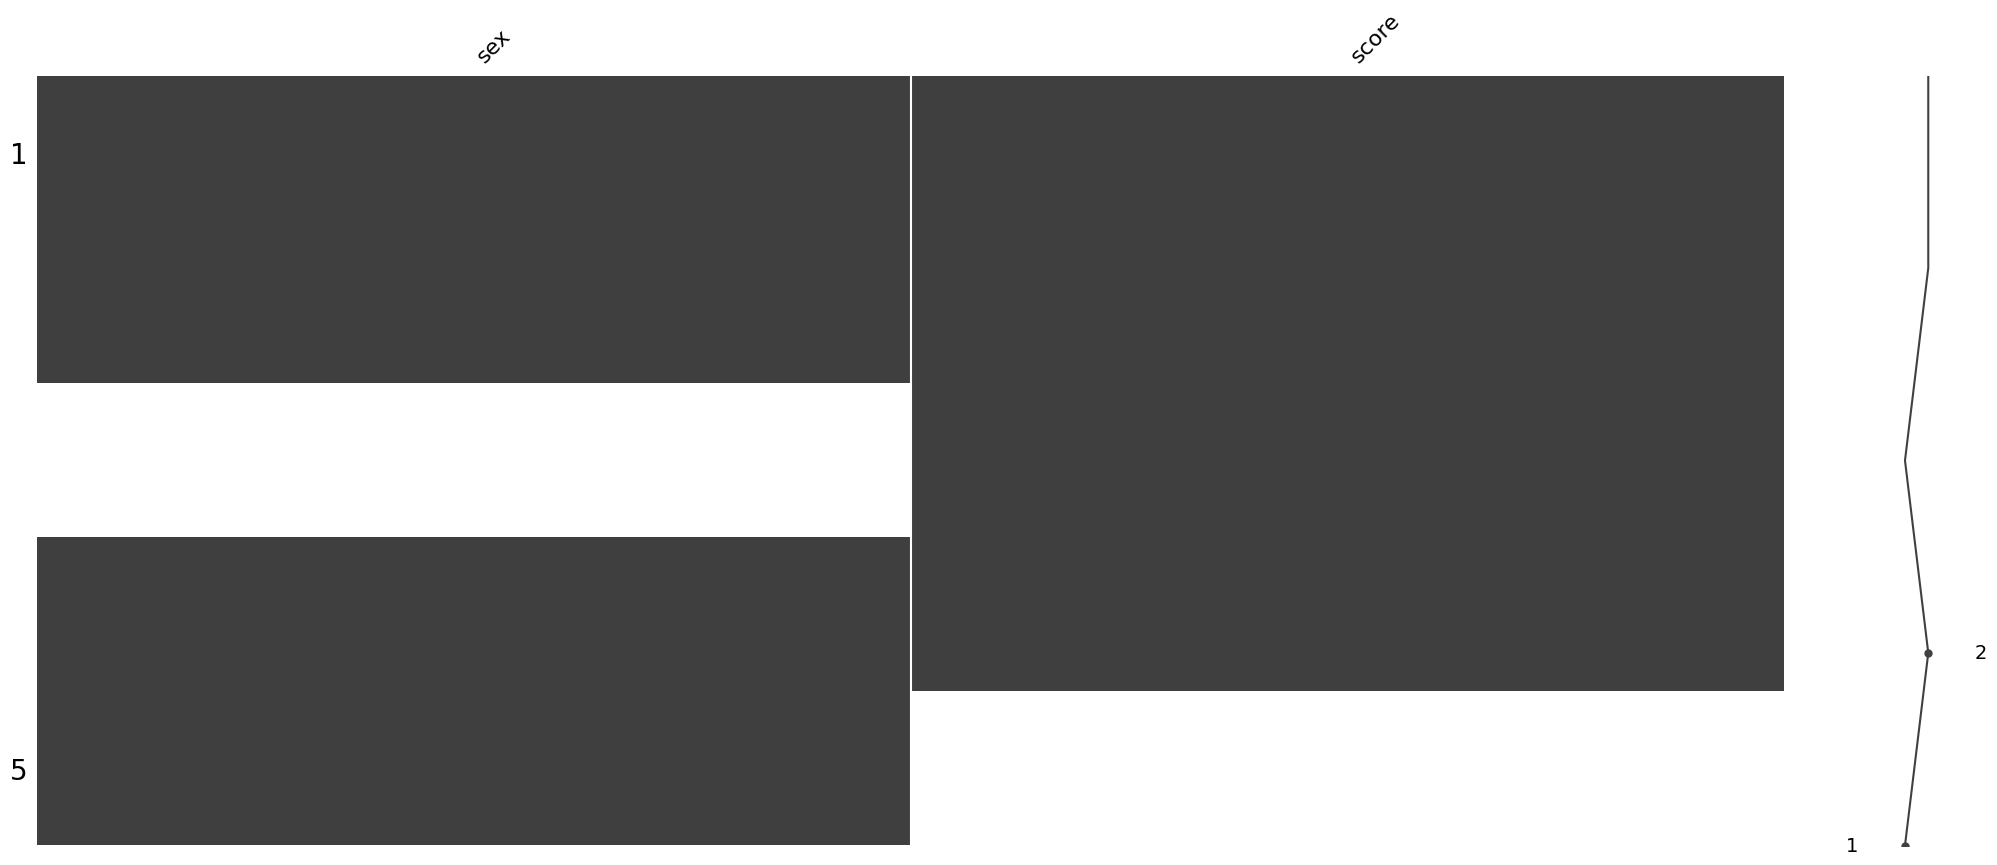

In [ ]:
import missingno as msno
import numpy as np

msno.matrix(df)
plt.show()

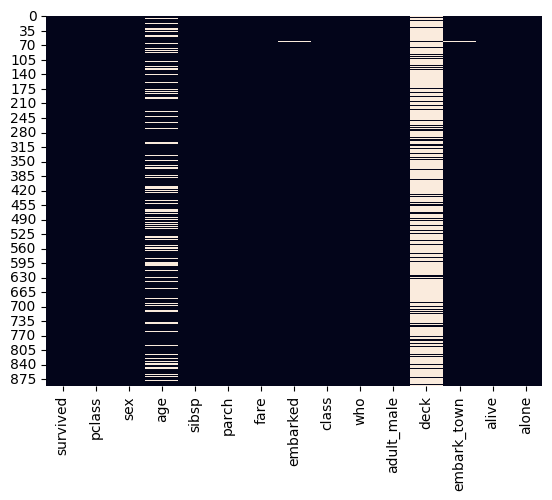

<Figure size 1000x700 with 0 Axes>

In [ ]:
tdf = sns.load_dataset('titanic')

sns.heatmap(tdf.isna(), cbar = False)
plt.figure(figsize=(10, 7))
plt.show()

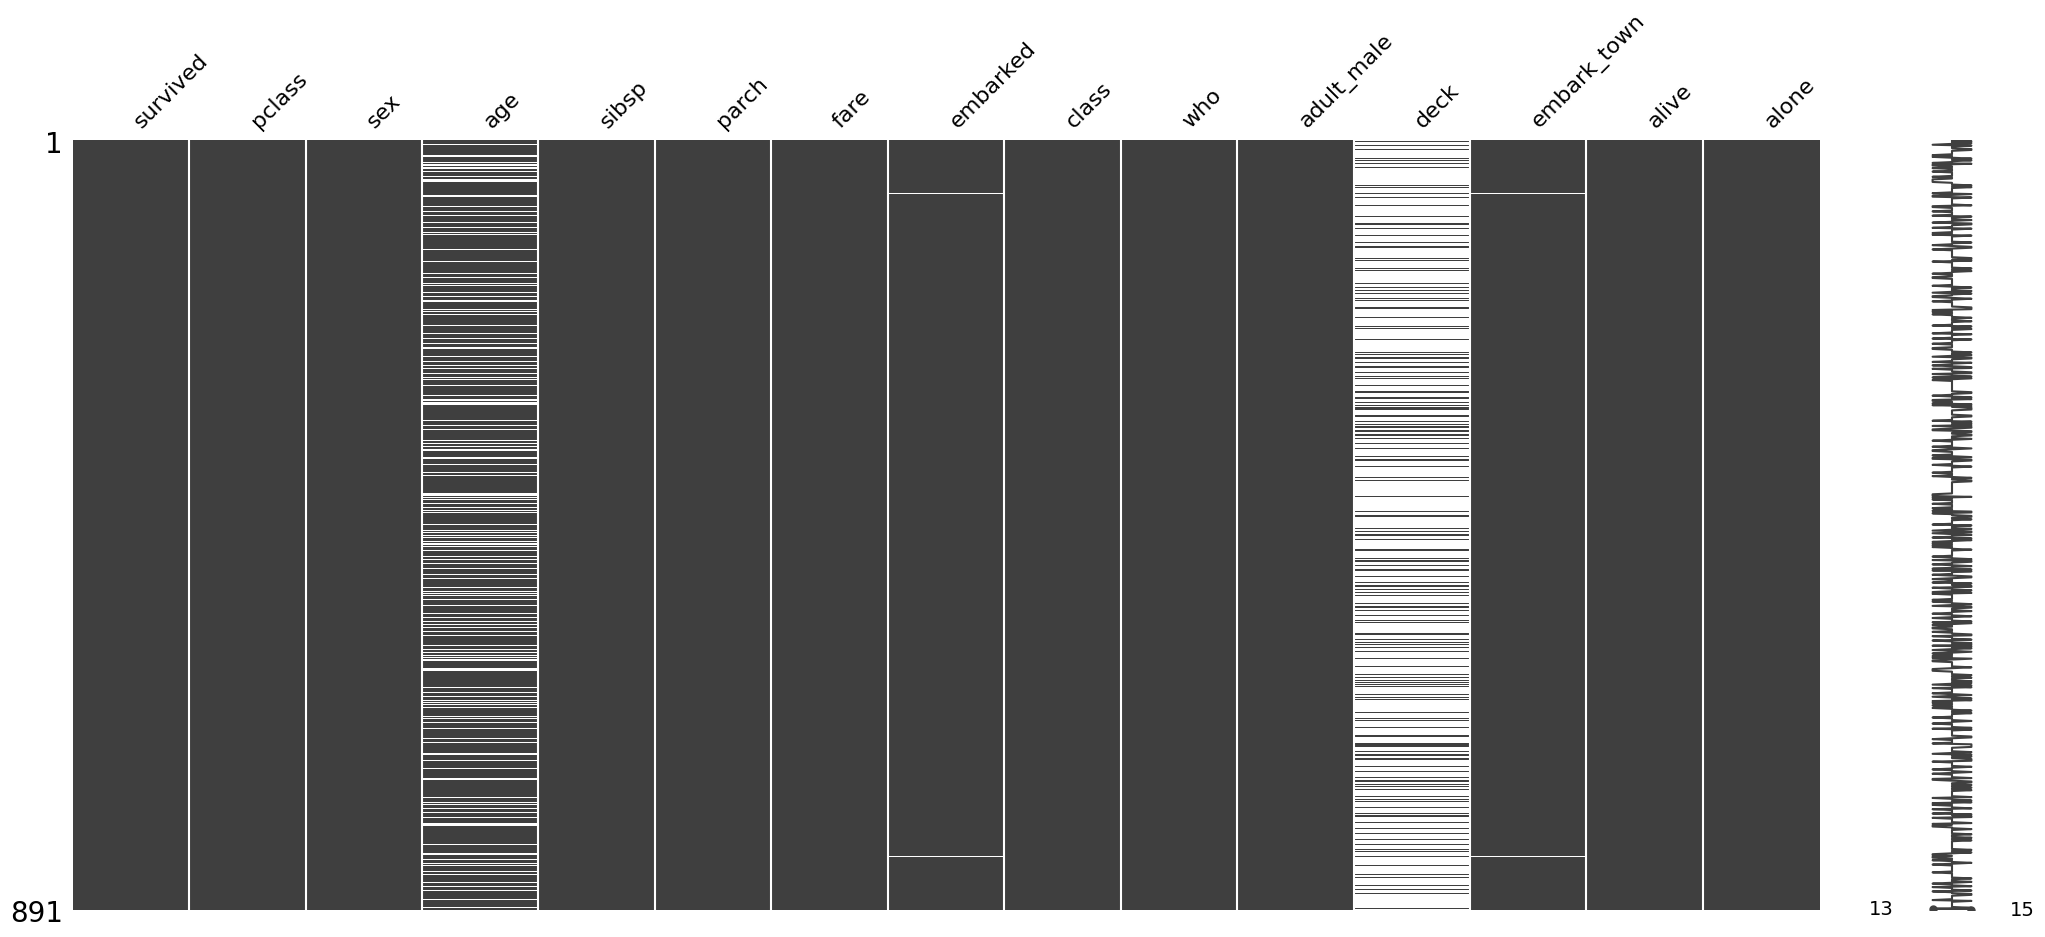

In [ ]:
msno.matrix(tdf)
plt.show()

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다
  - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
  - 그 점을 다음 행과 연결한 선

In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
tdf.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
543,1,2,male,32.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,yes,False
217,0,2,male,42.0,1,0,27.0000,S,Second,man,True,NaN,Southampton,no,False
190,1,2,female,32.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
141,1,3,female,22.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,yes,True
269,1,1,female,35.0,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
411,0,3,male,NaN,0,0,6.8583,Q,Third,man,True,NaN,Queenstown,no,True
721,0,3,male,17.0,1,0,7.0542,S,Third,man,True,NaN,Southampton,no,False
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


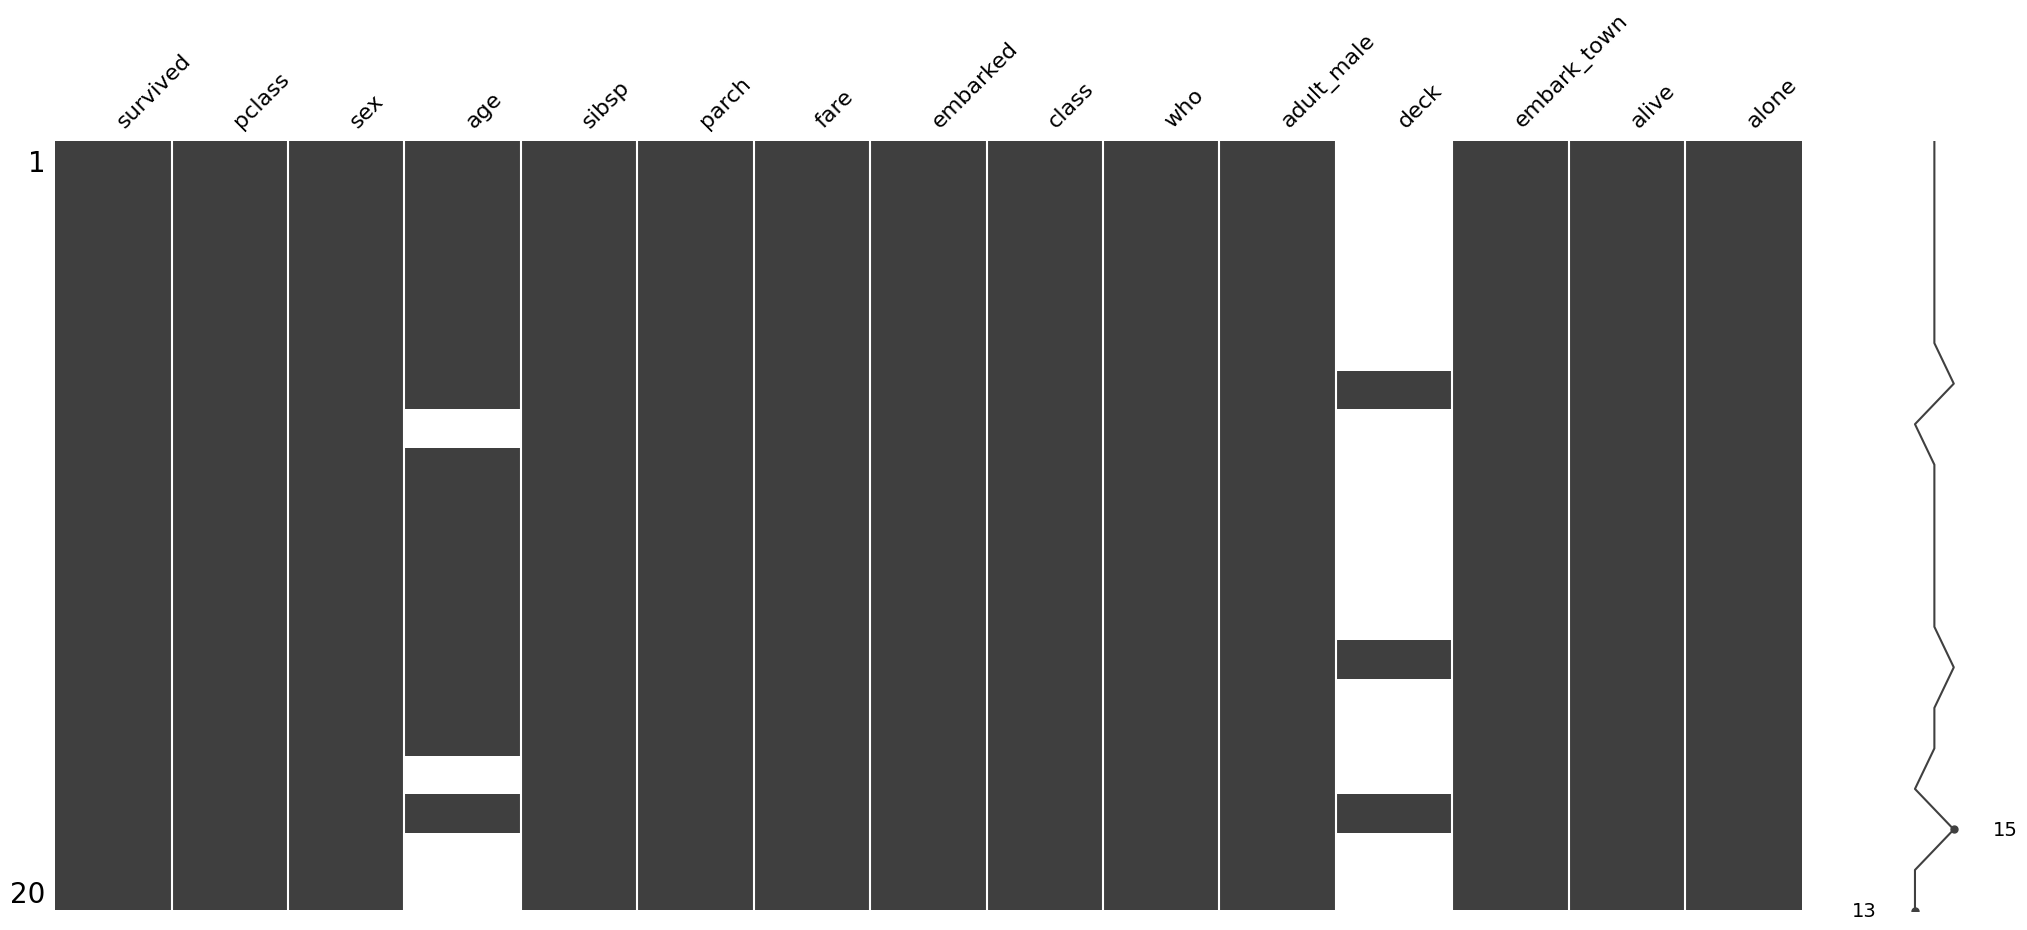

In [ ]:
msno.matrix(tdf2)
plt.show()

In [ ]:
tdf[tdf.isna().sum(axis = 1) == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


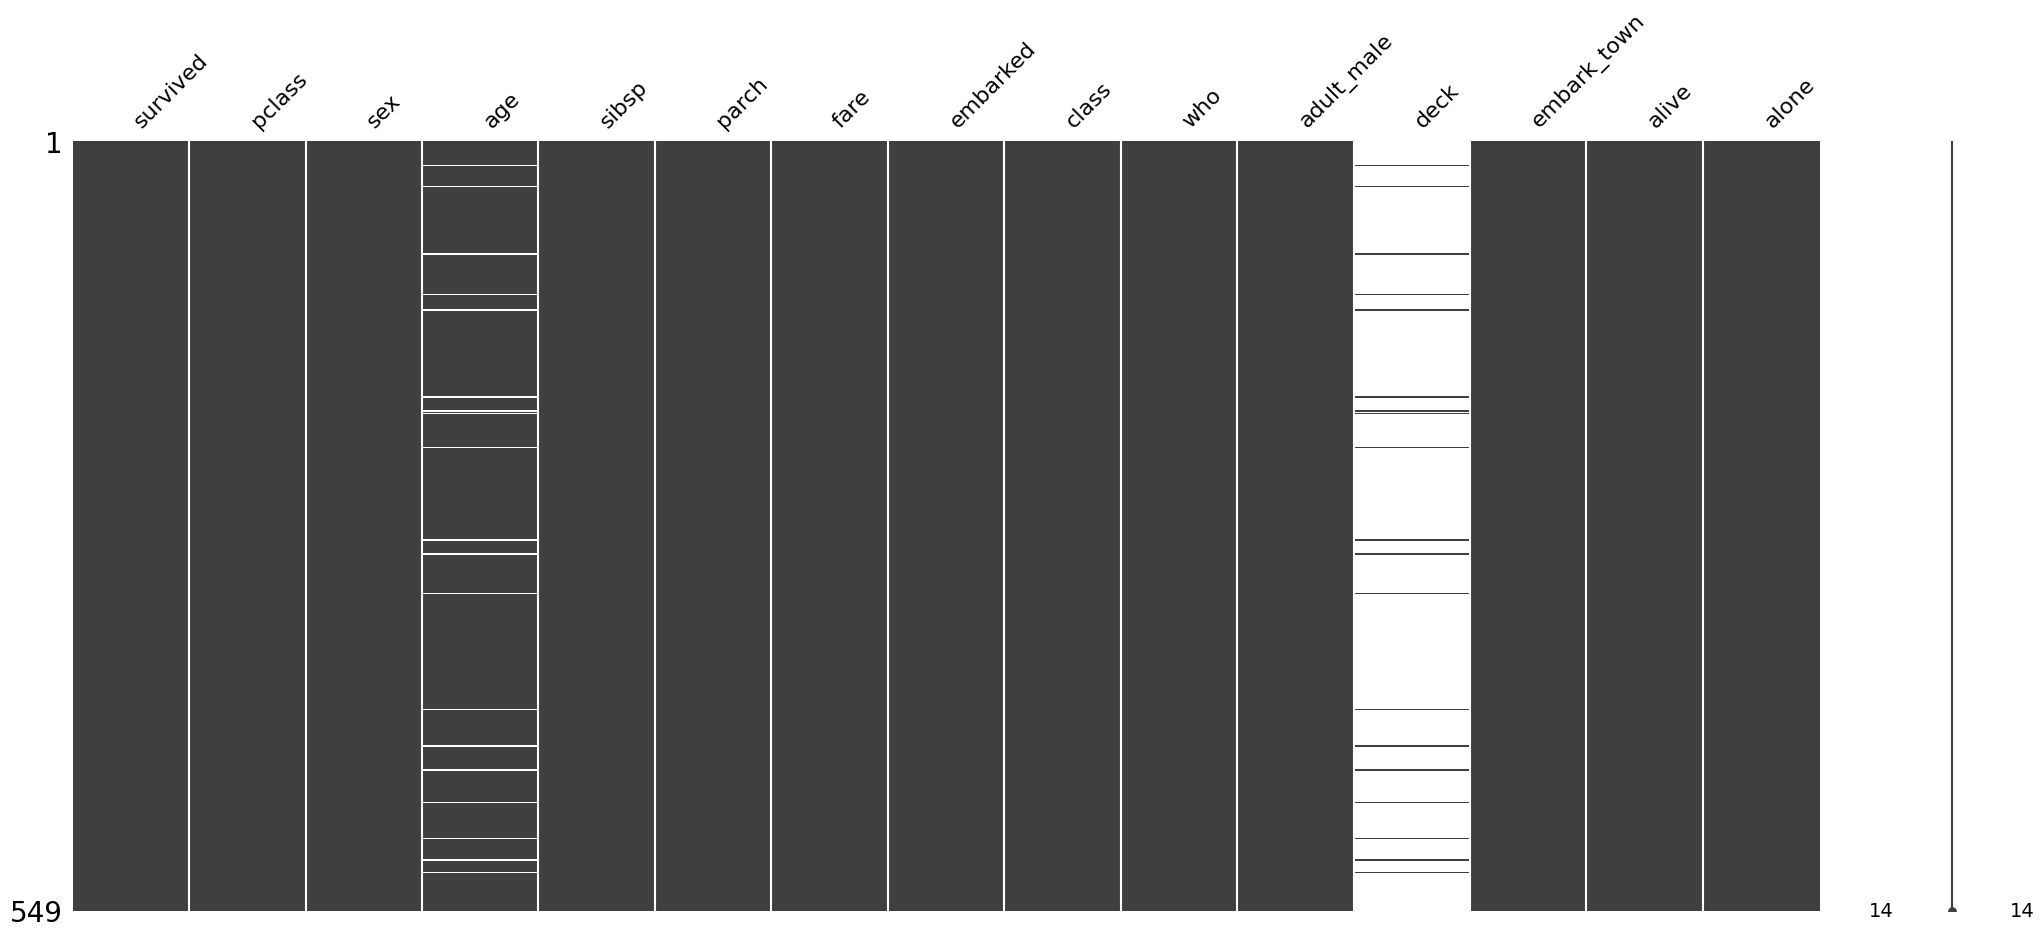

In [ ]:
msno.matrix(tdf[tdf.isna().sum(axis = 1) == 1]);

In [ ]:
tdf[tdf.isna().sum(axis = 1) == 2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

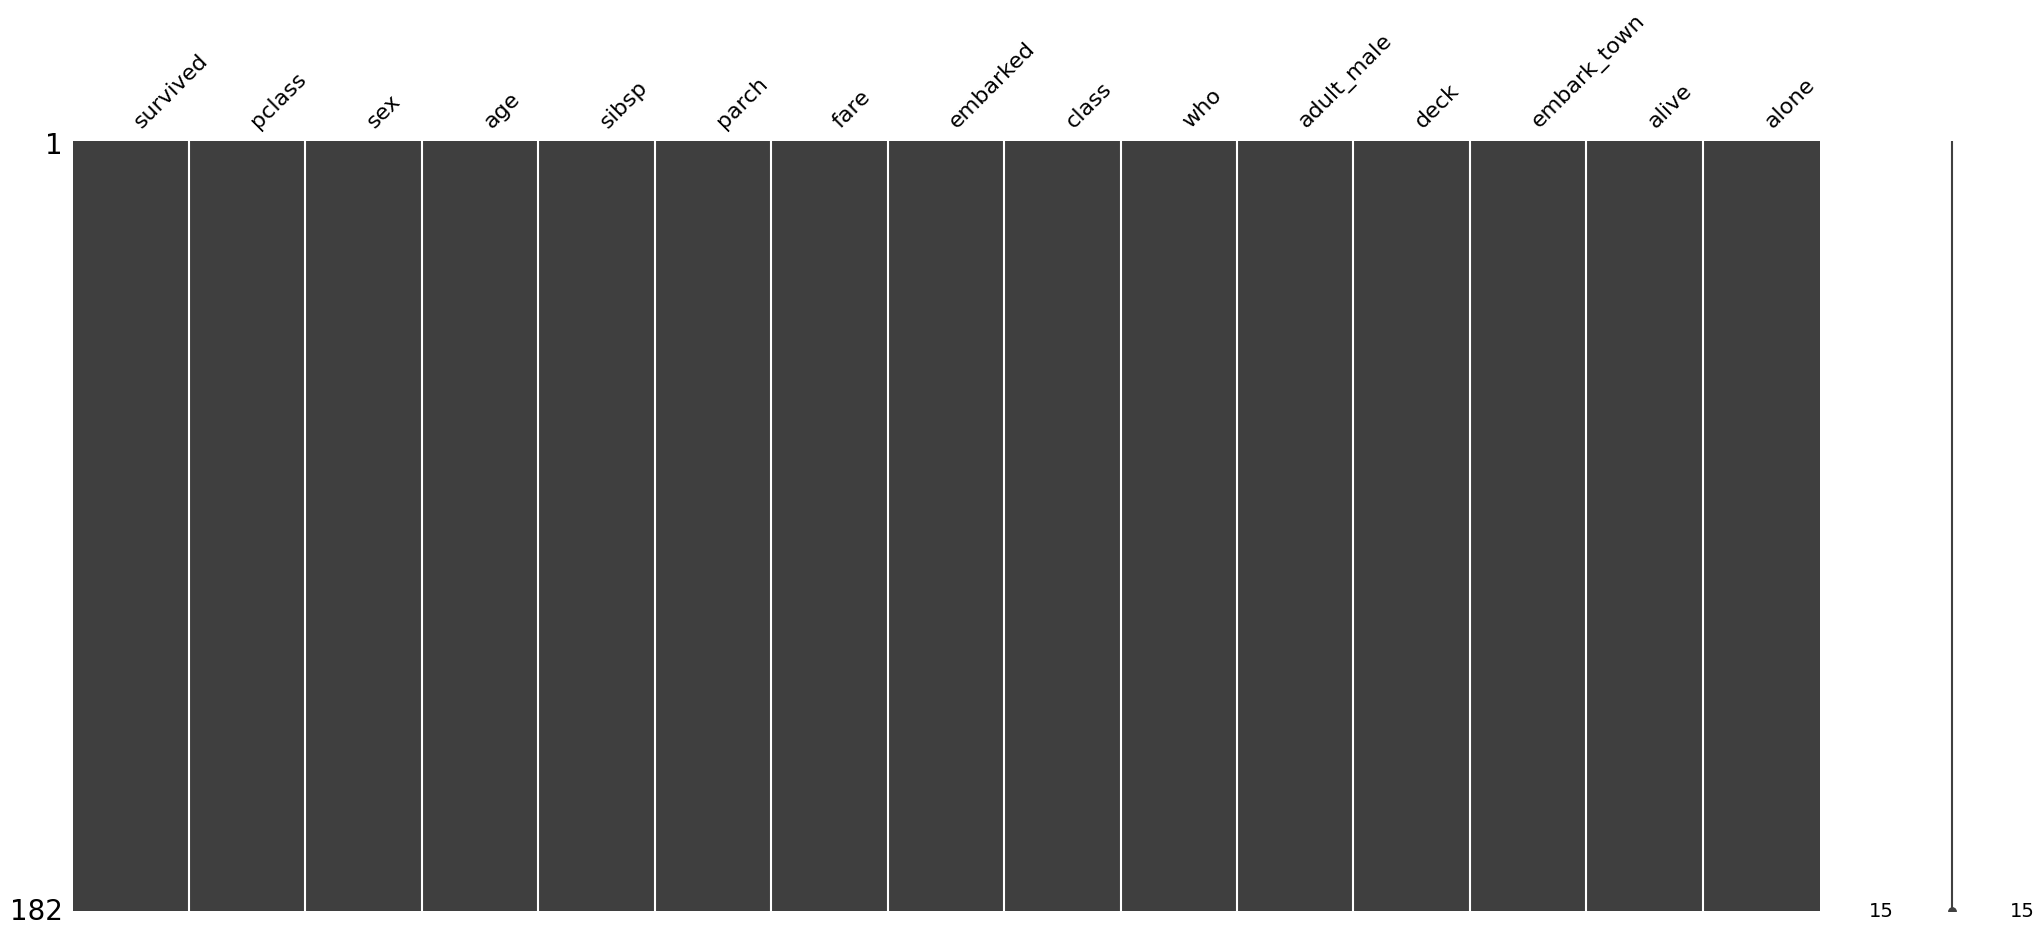

In [ ]:
msno.matrix(tdf[tdf.isna().sum(axis = 1) == 0])

In [ ]:
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
tdf[tdf.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


<Axes: >

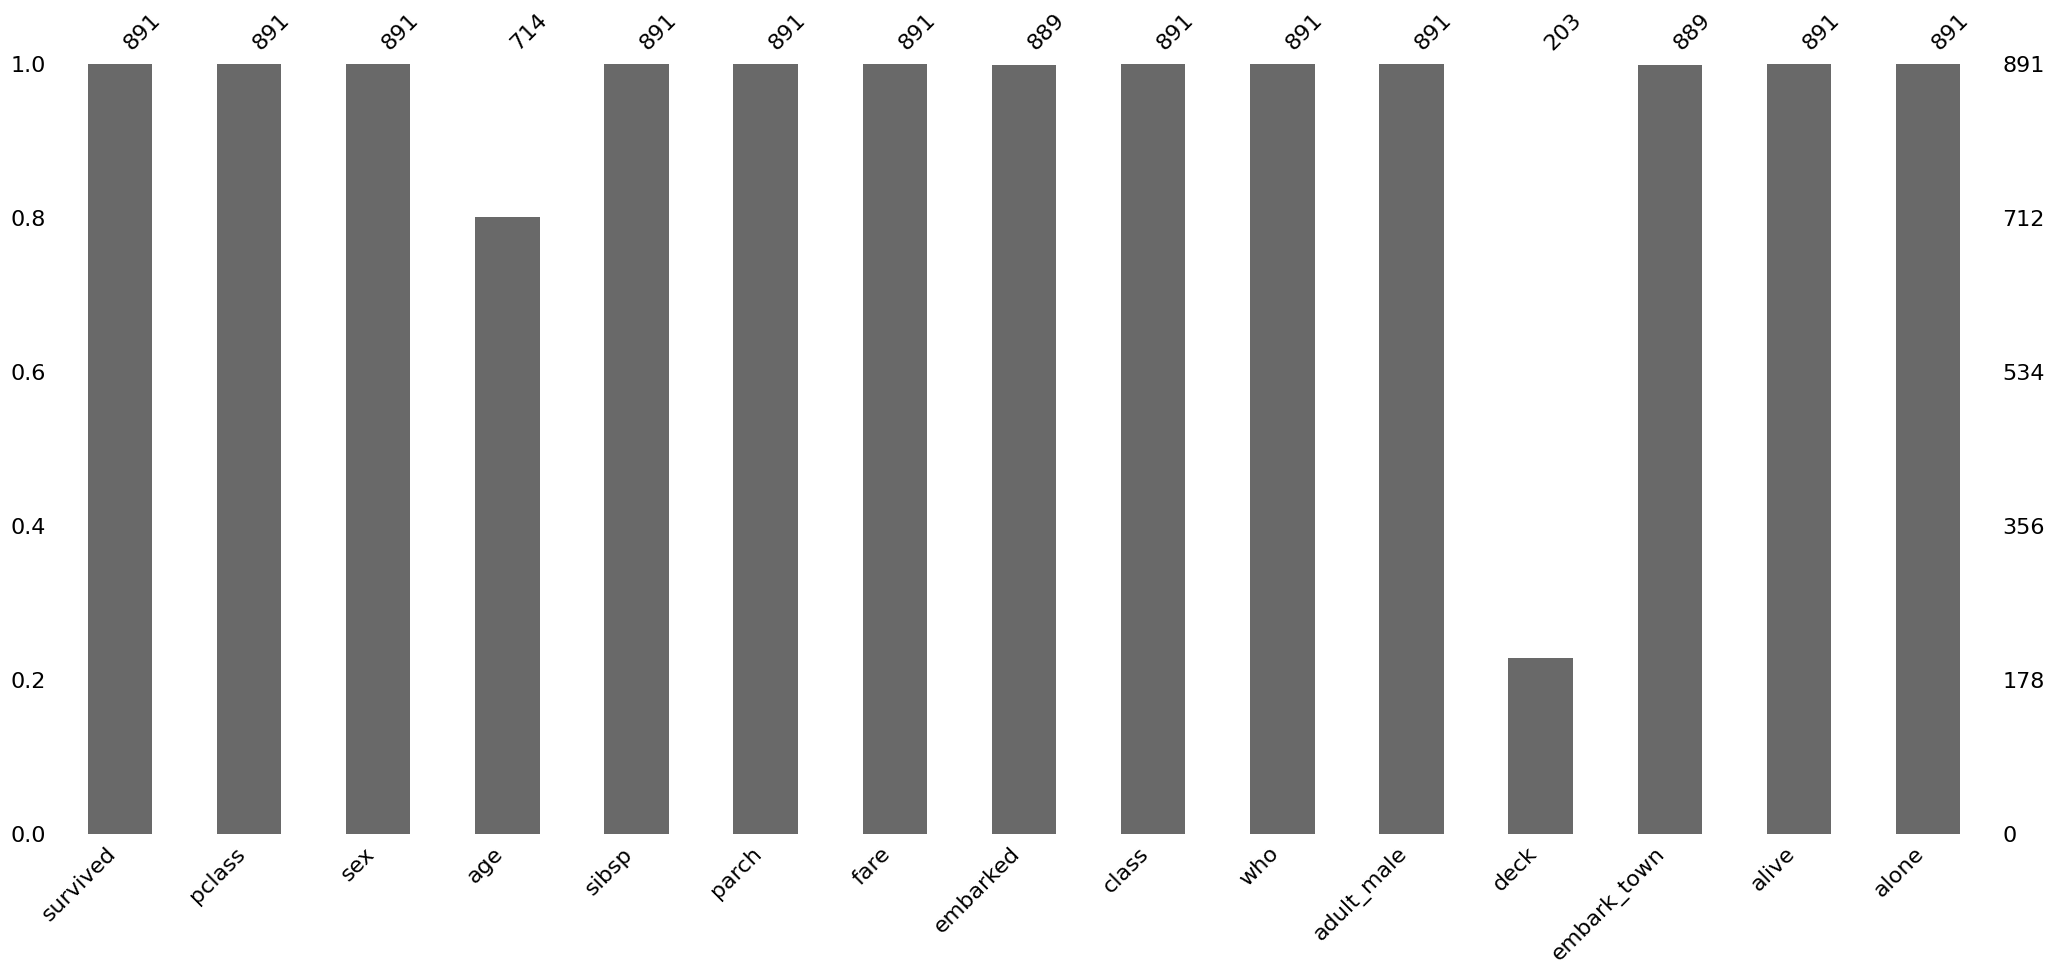

In [ ]:
msno.bar(tdf)

<Axes: >

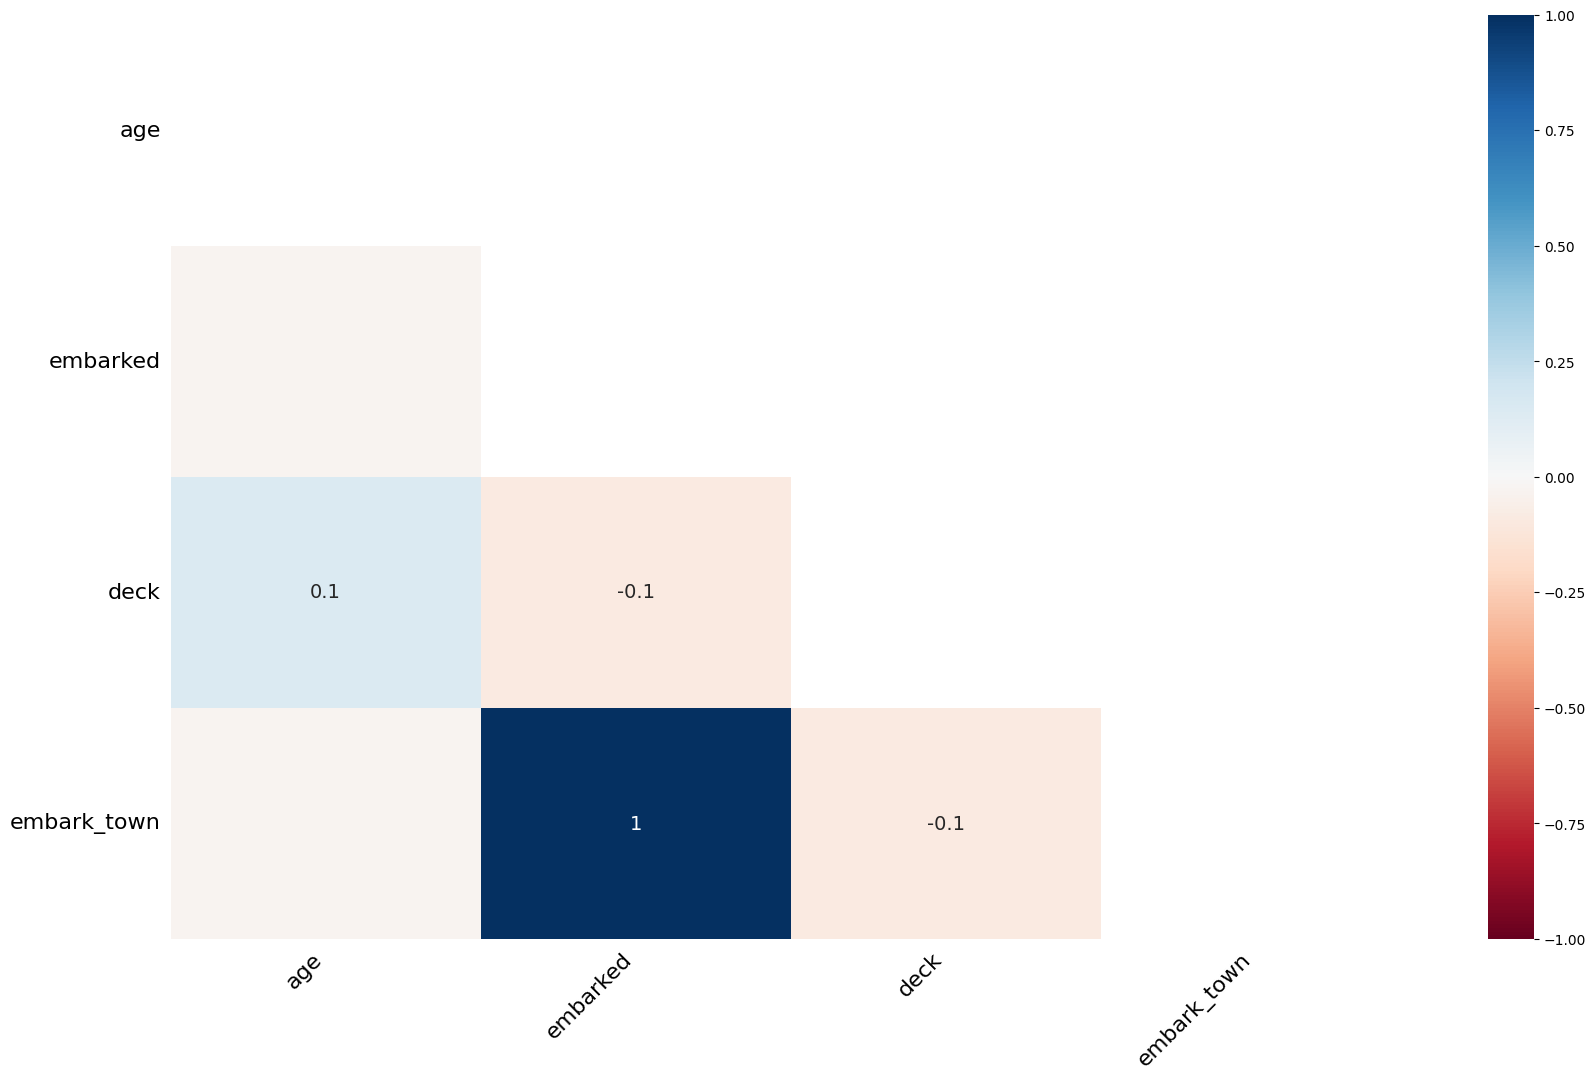

In [ ]:
msno.heatmap(tdf)

## 종료